### Objective: Building out a Multi Layer Perceptron model and trying to classify hand written digits using TensorFlow

### Project Description: 

### Using the famous MNIST data set of handwritten digits.
 The images are black and white images of size 28 x 28 pixels, or 784 pixels total. 
 Features will be the pixel values for each pixel. Either the pixel is "white" (blank with a 0), or there is some pixel value.
#### Trying to correctly predict what number is written down based solely on the image data in the form of an array. 
(Image Recognition) is a great use case for Deep Learning Methods!

In [2]:
import tensorflow as tf

In [4]:
# Importing MINST data

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


### Data Format
The data is stored in a vector format, although the original data was a 2-dimensional matirx with values representing how much pigment was at a certain location.

In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [8]:
type(mnist.train.images)

numpy.ndarray

In [10]:
mnist.train.images[3].shape

(784,)

In [31]:
sample = mnist.train.images[2017].reshape(28,28) # Can set random images 
sample

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.    

In [15]:
#To visualize the above array 

import matplotlib.pyplot as plt
%matplotlib inline

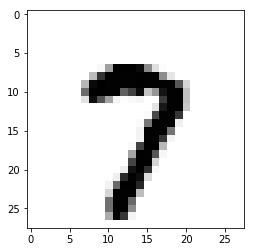

In [32]:
# matplot lib function(imshow) to show 2d matrix based on color scale.
plt.imshow(sample,cmap='Greys')

### Parameters
Since MNIST is pretty famous,some reasonable values for data are below. 
The parameters:

Learning Rate - How quickly to adjust the cost function.
Training Epochs - How many training cycles to go through.
Batch Size - Size of the 'batches' of training data.

In [34]:
# Parameters
learning_rate = 0.001
training_epochs = 15
batch_size = 100 

### Neural Network Parameters

The parameters which will directly define Neural Network, these would be adjusted depending on what data looks like and what kind of a net to build. Basically using some numbers eventually, and define some variables later on in the model.

In [37]:
n_hidden_1 = 256  # 1st layer number of features
n_hidden_2 = 256  # 2nd layer number of features
# More the layers more time to run the model. 

n_input = 784     # MNIST data input (img shape: 28*28)
n_classes = 10    # MNIST total classes (0-9 digits)

n_samples = mnist.train.num_examples

In [40]:
#Creating function

def multilayer_perceptron(x, weights, biases):
    '''
    x : Place Holder for Data Input
    weights: Dictionary of weights
    biases: Dicitionary of biases
    '''
    
 # First Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) # X * W + B
    layer_1 = tf.nn.relu(layer_1) # RELU(X * W + B) -> f(x) = max(0,x)
    
# Second Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
# Last Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

### Weights and Bias
Creating two dictionaries containing our weight and bias objects for the model. 
Using tf's built-in random_normal method to create the random values for weights and biases.

In [42]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [45]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

### TensorFlow Graph Input

In [53]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

###  MultiLayer Model

In [54]:
# Constructing model
pred = multilayer_perceptron(x, weights, biases)

### Cost and Optimization Functions

In [62]:
# Defining loss and optimizer #Using TensorFlow built-in cost & optimizer

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y,logits=pred))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### Initialization of Variables

Initializing all tf.Variable objects created earlier. This will be the first thing to run when training the model

In [63]:
# Initializing the variables
init = tf.global_variables_initializer()

### Training the Model

In [84]:
# Launching the session
sess = tf.InteractiveSession()

# Intializing all the variables
sess.run(init)

# Training Epochs
# Essentially the max amount of loops possible before we stop
# May stop earlier if cost/loss limit was set
for epoch in range(training_epochs):

    # Starting with cost = 0.0
    avg_cost = 0.0

    # Converting total number of batches to integer
    total_batch = int(n_samples/batch_size)

    # Loop over all batches
    for i in range(total_batch):

        # Getting next batch of training data and labels
        batch_x, batch_y = mnist.train.next_batch(batch_size)

        # Feed dictionary for optimization and loss value
        # Returns a tuple, but only need 'c' the cost
        # So set an underscore as a "throwaway"
        _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

        # Computing average loss
        avg_cost += c / total_batch
    print("Epoch: {} cost={:.4f}".format(epoch+1,avg_cost))

print("Model has completed {} Epochs of Training".format(training_epochs))

Epoch: 1 cost=178.5591
Epoch: 2 cost=41.1259
Epoch: 3 cost=26.0991
Epoch: 4 cost=18.3055
Epoch: 5 cost=13.3953
Epoch: 6 cost=9.8572
Epoch: 7 cost=7.3609
Epoch: 8 cost=5.4481
Epoch: 9 cost=4.1653
Epoch: 10 cost=3.0505
Epoch: 11 cost=2.3722
Epoch: 12 cost=1.6750
Epoch: 13 cost=1.4569
Epoch: 14 cost=0.9817
Epoch: 15 cost=0.8333
Model has completed 15 Epochs of Training


                                                 Understanding NN: 
Training the Neural network with same 55,000 data samples 15 times.  

For One Epoch :

The total data set is divided into 100 sets of 550 samples.

So after the first 550 samples we calculate cost and try to reduce the cost by using the optimizer. And basically, Weight is updated after each 550 samples.

### Model Evaluations

In [85]:
# Test model
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [86]:
print(correct_predictions[0])

Tensor("strided_slice_4:0", shape=(), dtype=bool)


#Using tf.cast to cast the Tensor of booleans back into a Tensor of Floating point values in order to take the mean of it.

In [87]:
correct_predictions = tf.cast(correct_predictions, "float")

In [88]:
print(correct_predictions[0])

Tensor("strided_slice_5:0", shape=(), dtype=float32)


In [89]:
# mean of the elements across the tensor.
accuracy = tf.reduce_mean(correct_predictions)

In [90]:
mnist.test.labels

array([[ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  1.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [91]:
mnist.test.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [92]:
#Using eval() method to directly evaluate tensor in a `Session` without needing to call tf.sess():mm

print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

Accuracy: 0.9419


### Conclusion:
94% isn't anywhere near as good as it could be.
Running for more training epochs with data (around 20,000) can produce accuracy around 99%. 
But, I am not doing it here because that will take a very long time to run!